## DecisionTree Regression - Movies Data Collection Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Movie_regression.csv", header=0)
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Missing Value Imputation

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marketing expense,506.0,92.270471,172.030902,20.1264,21.64090,25.1302,93.54165,1799.524
Production expense,506.0,77.273557,13.720706,55.9200,65.38000,74.3800,91.20000,110.480
Multiplex coverage,506.0,0.445305,0.115878,0.1290,0.37600,0.4620,0.55100,0.615
Budget,506.0,34911.144022,3903.038232,19781.3550,32693.95250,34488.2175,36793.54250,48772.900
Movie_length,506.0,142.074901,28.148861,76.4000,118.52500,151.0000,167.57500,173.500
Lead_ Actor_Rating,506.0,8.014002,1.054266,3.8400,7.31625,8.3075,8.86500,9.435
Lead_Actress_rating,506.0,8.185613,1.054290,4.0350,7.50375,8.4950,9.03000,9.540
Director_rating,506.0,8.019664,1.059899,3.8400,7.29625,8.3125,8.88375,9.425
Producer_rating,506.0,8.190514,1.049601,4.0300,7.50750,8.4650,9.03000,9.635
Critic_rating,506.0,7.810870,0.659699,6.6000,7.20000,7.9600,8.26000,9.400


In [5]:
data['Time_taken'].mean()

157.3914979757085

In [6]:
data['Time_taken'].fillna(value=data['Time_taken'].mean(), inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Dummy Variable Creation

In [8]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [9]:
data = pd.get_dummies(data=data, columns=['3D_available','Genre'], drop_first=True)

In [10]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


### Splitting data into X and y

In [11]:
X = data.loc[:,data.columns != 'Collection']
type(X)

pandas.core.frame.DataFrame

In [12]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [13]:
y = data.loc[:,data.columns == 'Collection']
type(y)

pandas.core.frame.DataFrame

In [14]:
y.head()

,Collection
0,48000
1,43200
2,69400
3,66800
4,72400


In [15]:
X.shape

(506, 19)

In [16]:
y.shape

(506, 1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [18]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,1,0,0,0


In [19]:
y_train.head()

,Collection
220,53400
71,43400
240,54000
6,45800
417,20800


In [20]:
X_test.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
329,21.3448,61.48,0.540,35179.815,90.7,7.320,7.460,7.275,7.515,8.62,483051,111.040000,283.616,53,452,0,1,0,0
371,204.6460,91.20,0.369,34529.880,173.5,9.310,9.525,9.320,9.505,7.96,454281,196.000000,268.000,25,609,1,1,0,0
219,22.2850,82.78,0.450,35402.015,165.9,8.175,8.375,8.315,8.405,8.72,451935,123.200000,263.680,21,561,1,1,0,0
403,516.0340,91.20,0.307,29713.695,169.5,9.125,9.310,9.060,9.100,6.96,384237,157.391498,301.328,40,677,1,0,0,1
78,21.1292,80.66,0.563,34618.760,127.2,7.330,7.500,7.450,7.690,8.26,447528,176.480000,303.392,53,377,1,0,1,0


In [21]:
y_test.head()

,Collection
329,45200
371,100000
219,46000
403,16600
78,42400


In [22]:
print(X_train.shape)
print(y_train.shape)
print('---------')
print(X_test.shape)
print(y_test.shape)

(404, 19)
(404, 1)
---------
(102, 19)
(102, 1)


### Training Regression Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
rtree = DecisionTreeRegressor(max_depth=3)

In [24]:
rtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Predict values using trained model

In [25]:
y_train_pred = rtree.predict(X_train)
y_test_pred = rtree.predict(X_test)

### Model Performance

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
mean_squared_error(y_test, y_test_pred)

117077216.27161306

In [28]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [29]:
r2_score(y_test, y_test_pred)

0.636321038122745

### Plotting decision tree

In [30]:
from sklearn import tree
dot_data = tree.export_graphviz(
                                rtree,
                                out_file=None,
                                feature_names=X_train.columns,
                                filled=True
                                )

In [32]:
from IPython.display import Image
import pydotplus

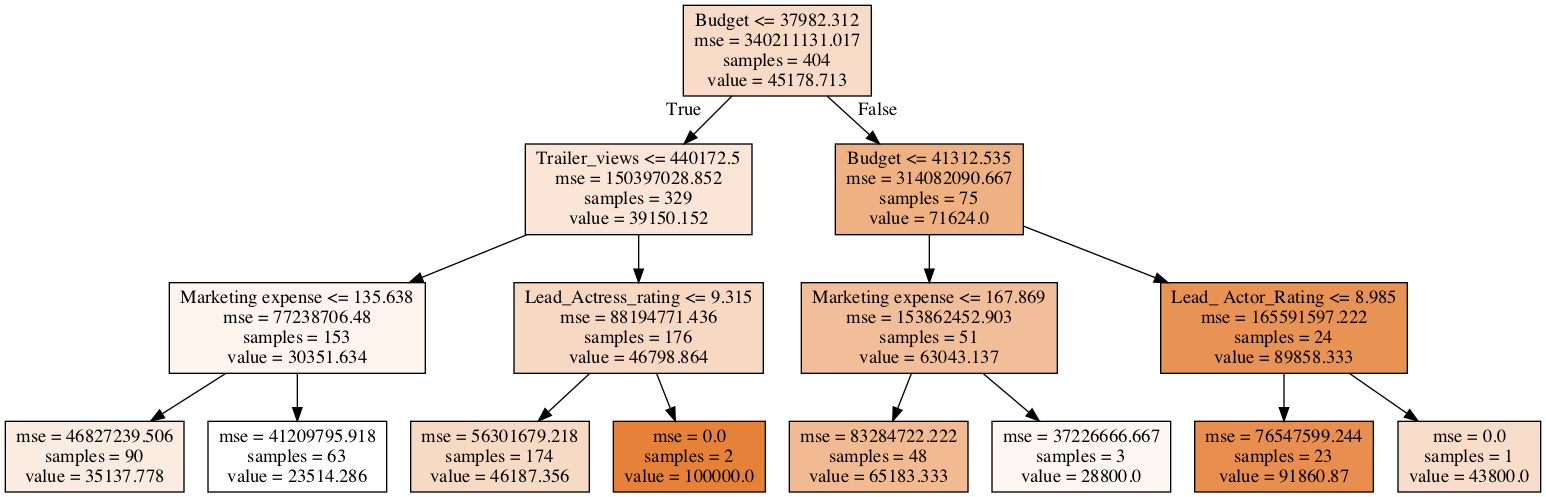

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [34]:
X_train.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       '3D_available_YES', 'Genre_Comedy', 'Genre_Drama', 'Genre_Thriller'],
      dtype='object')

### Controlling Tree growth

#### Maximum number of levels in tree

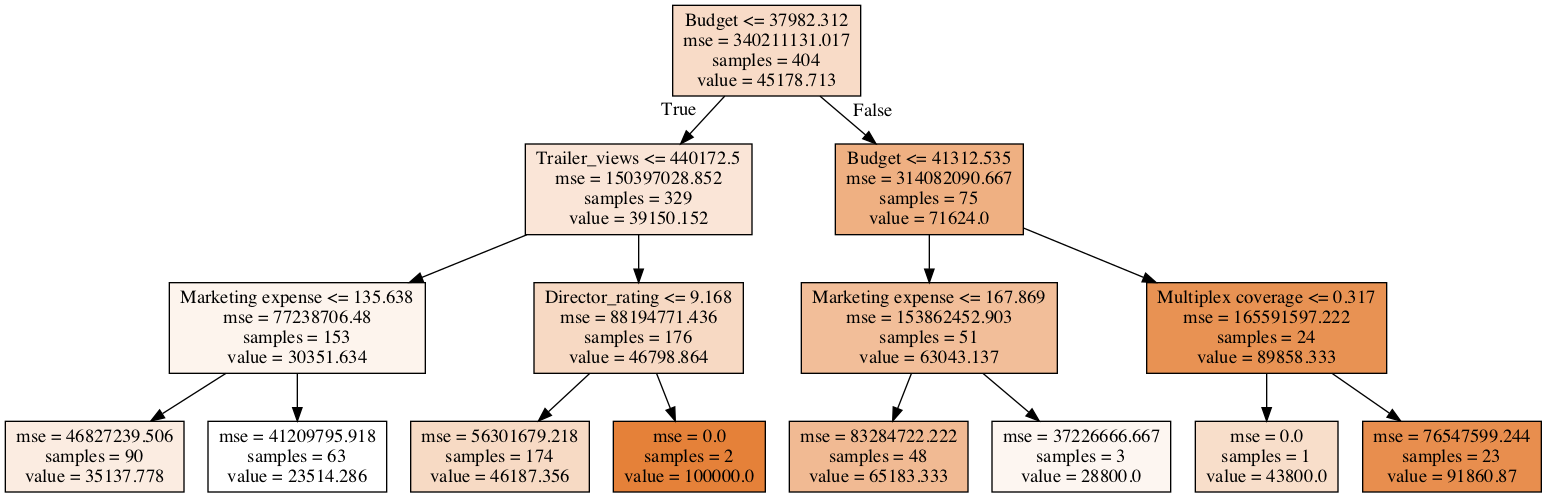

In [35]:
rtree_3 = DecisionTreeRegressor(max_depth=3)
rtree_3.fit(X_train, y_train)
dot_data = tree.export_graphviz(rtree_3, out_file=None,feature_names= X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

#### Minimum observations at internal node

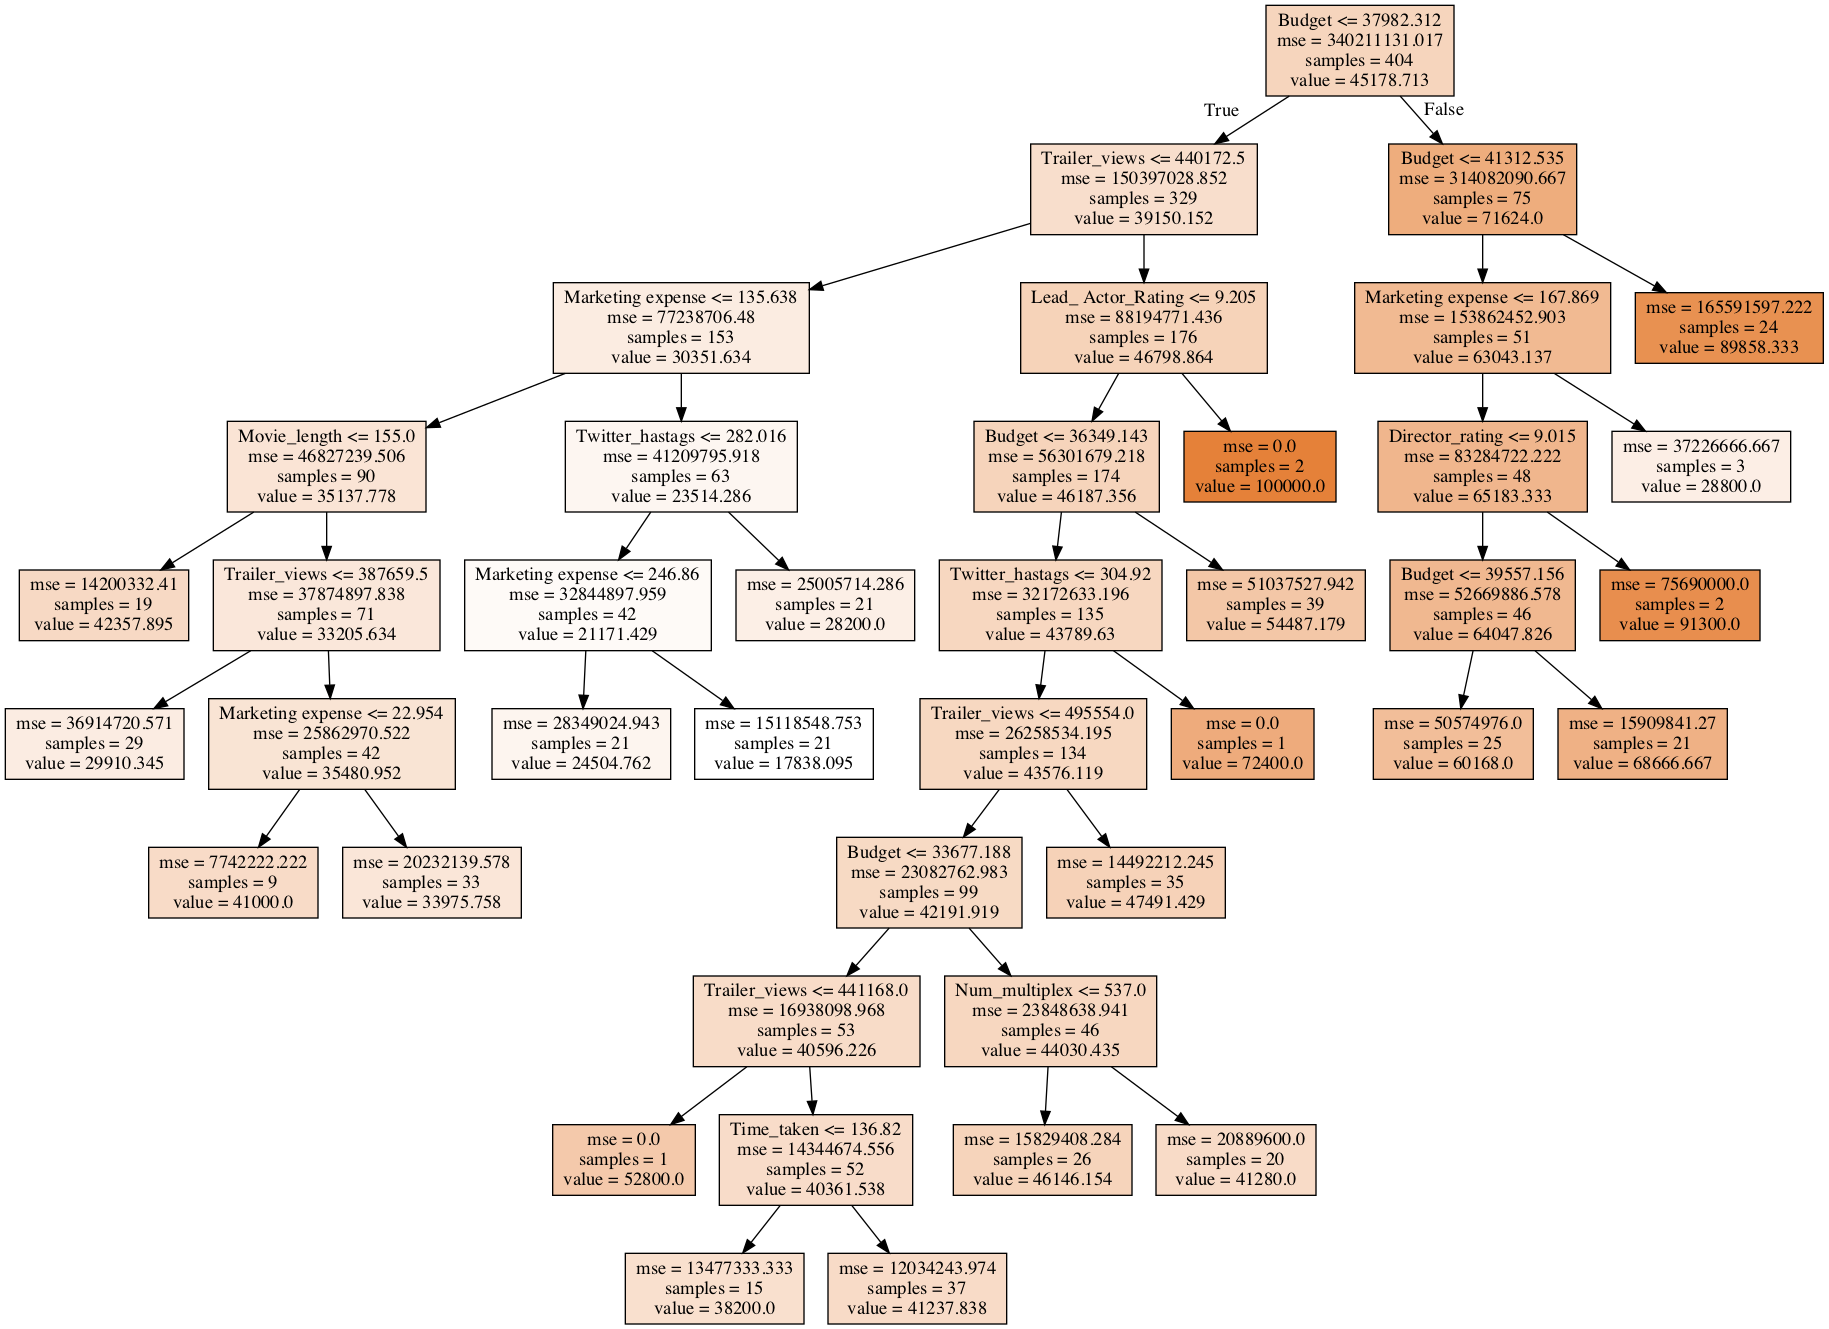

In [36]:
rtree_4 = tree.DecisionTreeRegressor(min_samples_split = 40)
rtree_4.fit(X_train, y_train)
dot_data = tree.export_graphviz(rtree_4, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

#### Minimum observations at leaf node

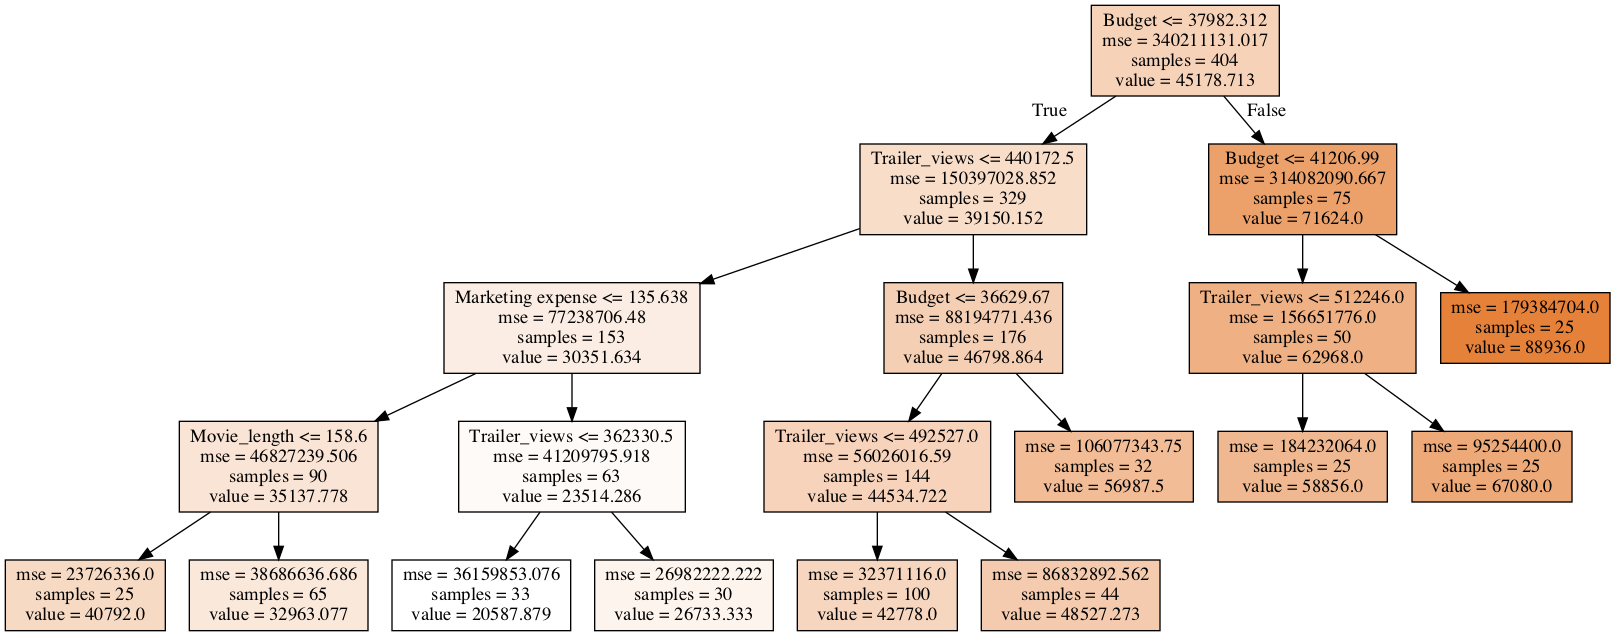

In [39]:
rtree_5 = DecisionTreeRegressor(min_samples_leaf = 25, max_depth=4)
rtree_5.fit(X_train, y_train)
dot_data = tree.export_graphviz(rtree_5, out_file=None,feature_names= X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())